### shamik_april_2
## vanilla network with numpy with bias

## Load libraries and define activations

In [42]:
from matplotlib import pyplot as plt 
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
def softmax(x):
    """Compute softmax values for each sets of scores in x."""   
    return np.exp(x) / np.sum(np.exp(x), axis=0)
n_input = int(2)
n_hidden = int(3)
n_output = int(2)
n_epochs = 50

## Function for forward pass of data

In [43]:
def forward_pass_output(input_vector,hidden_weights,output_weights):
        # input_vector is ndarray
        input_vector = np.append(input_vector,1.0)
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(hidden_weights, input_vector)
        output_vector = sigmoid(output_vector)
        output_vector = np.append(output_vector,1.0)
        output_vector = np.array(output_vector, ndmin=2).T
        output_vector = np.dot(output_weights, output_vector)
        output_vector = softmax(output_vector)
        return output_vector


## Backpropagation 

In [44]:
def train(input_vector,expected_vector,learning_rate,hidden_weights,output_weights ):
     
    input_vector_bias = np.append(input_vector,1.0)
    input_vector_bias = np.array(input_vector_bias, ndmin=2).T
    input_vector = np.array(input_vector, ndmin=2).T
    expected_vector = np.array(expected_vector, ndmin=2).T
    output_vector1 = np.dot(hidden_weights, input_vector_bias)
    output_vector_hidden = sigmoid(output_vector1)
    output_vector_hidden_bias = np.append(output_vector_hidden,1.0)
    output_vector_hidden_bias = np.array(output_vector_hidden_bias, ndmin=2).T
    output_vector2 = np.dot(output_weights, output_vector_hidden_bias)
    output_vector_network = softmax(output_vector2)
    #calculate output error
    error_at_output = (expected_vector - output_vector_network)
    # update the weights:
    del_output = error_at_output * output_vector_network * (1.0 - output_vector_network)
    deltaoutput = learning_rate  * np.dot(del_output, output_vector_hidden_bias.T)
    output_weights_orig = output_weights
    output_weights += deltaoutput
    # calculate hidden errors:
    del_hidden = np.dot(output_weights_orig[:,0:3].T,del_output )
    # update the weights:
    deltahidden = del_hidden * output_vector_hidden * (1.0 - output_vector_hidden)
    hidden_weights[:,0:2] += learning_rate * np.dot(deltahidden, input_vector.T)
    # update bias
    
    delta_b = del_hidden * output_vector_hidden * (1.0 - output_vector_hidden)
    hidden_weights[:,2] += learning_rate * delta_b.reshape(3,)

## Training using forward prop and back prop

In [45]:
def train_network(dataset, l_rate, n_epoch):
    loss_array = np.array([])
    epoch_array = np.array([])
    for epoch in range(n_epoch):
        print "epoch =",epoch
        sum_error = 0
        event_count = 0
        for row in dataset:
            #print row
            event_count =event_count+1
            #if event_count % 1000 == 0:
            #    print event_count,"events done out of",len(dataset)
            X_train = row[:2]
            Y_train = row[2:]
            outputs = forward_pass_output(X_train,hidden_weights_set,output_weights_set)
            expected = np.array(Y_train,ndmin=2).T
            sum_error += np.sum([(expected-outputs)**2])/2
            train(X_train,Y_train,l_rate,hidden_weights_set,output_weights_set)
        print ("epoch, lrate, error=",epoch, l_rate, sum_error/len(dataset))
        loss_array = np.append(loss_array,sum_error/len(dataset))
        epoch_array = np.append(epoch_array,int(epoch+1))
    
    plt.plot(epoch_array,loss_array)
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.show()

## load data for training

initial hidden layer weights:
[[ 0.29447351  0.40108021  0.75105151]
 [ 0.41633927  0.46349421  0.34249587]
 [ 0.60256227  0.5743393   0.34369388]]
initial ouput layer weights:
[[ 0.2391558   0.68540243  0.42522344  0.96957793]
 [ 0.24142083  0.37537084  0.03357686  0.1344572 ]]
epoch = 0
('epoch, lrate, error=', 0, 0.01, 0.25464823155557403)
epoch = 1
('epoch, lrate, error=', 1, 0.01, 0.25034195701523376)
epoch = 2
('epoch, lrate, error=', 2, 0.01, 0.2501198584275211)
epoch = 3
('epoch, lrate, error=', 3, 0.01, 0.24904490880491859)
epoch = 4
('epoch, lrate, error=', 4, 0.01, 0.24668228375348081)
epoch = 5
('epoch, lrate, error=', 5, 0.01, 0.24528737291042541)
epoch = 6
('epoch, lrate, error=', 6, 0.01, 0.24369068338086292)
epoch = 7
('epoch, lrate, error=', 7, 0.01, 0.24173702636916428)
epoch = 8
('epoch, lrate, error=', 8, 0.01, 0.23927860731255629)
epoch = 9
('epoch, lrate, error=', 9, 0.01, 0.2361124195801888)
epoch = 10
('epoch, lrate, error=', 10, 0.01, 0.23196649150663184)
epoch

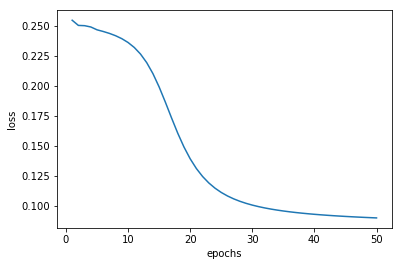

final hidden layer weights:
[[ 0.37984254  0.51551716 -7.38816256]
 [ 0.49914492  0.54860278  0.35628779]
 [ 0.63202397  0.60550842  0.34911541]]
final ouput layer weights:
[[-4.21779786  1.34538706  1.14560368  1.70532293]
 [ 4.69837449 -0.2846138  -0.68680339 -0.6012878 ]]


In [46]:
dataset = np.loadtxt(fname="sample_shuff_train.txt")
hidden_weights_set = np.random.rand(n_hidden,n_input+1)
output_weights_set = np.random.rand(n_output,n_hidden+1)
print "initial hidden layer weights:\n",hidden_weights_set
print "initial ouput layer weights:\n",output_weights_set   
train_network(dataset, 0.01, n_epochs)
print "final hidden layer weights:\n",hidden_weights_set
print "final ouput layer weights:\n",output_weights_set

## testing network

In [47]:
def test_network(dataset1,dataset2):
    sum_error = 0
    event_count = 0
    event_count2 = 0
    classa_pred = np.array([])
    classb_pred = np.array([])
    for row in dataset1:
            event_count =event_count+1
            if event_count % 1000 == 0:
                print event_count,"events done out of",len(dataset)
            X_train = row[:2]
            Y_train = row[2:]
            outputs = forward_pass_output(X_train,hidden_weights_set,output_weights_set)
            classa_pred = np.append(classa_pred,outputs[0])
    for row in dataset2:
            event_count2 =event_count2+1
            if event_count2 % 1000 == 0:
                print event_count2,"events done out of",len(dataset)
            X_train = row[:2]
            Y_train = row[2:]
            outputs = forward_pass_output(X_train,hidden_weights_set,output_weights_set)
            classb_pred = np.append(classb_pred,outputs[0])           
                
    plt.hist(classa_pred,bins=100,range=[0,1],color="R")
    plt.hist(classb_pred,bins=100,range=[0,1],color="B")
    plt.legend(['Class A', 'Class B'], loc='upper right')
    plt.show()
    print "class A accuracy =", sum(np.array ([1.0 if i >= 0.5 else 0.0 for i in classa_pred]))/len(dataset1)
    print "class B accuracy =", sum(np.array ([1.0 if i <= 0.5 else 0.0 for i in classb_pred]))/len(dataset2)
    print "combined accuracy=", (sum(np.array ([1.0 if i >= 0.5 else 0.0 for i in classa_pred])) + sum(np.array ([1.0 if i <= 0.5 else 0.0 for i in classb_pred])))/(len(dataset1)+len(dataset2))

1000 events done out of 4000
2000 events done out of 4000
1000 events done out of 4000
2000 events done out of 4000


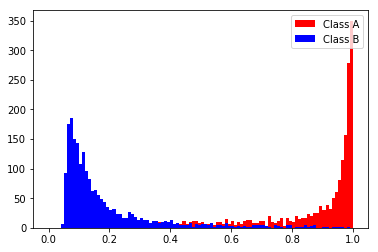

class A accuracy = 0.8415
class B accuracy = 0.936
combined accuracy= 0.88875


In [48]:
dataset1 = np.loadtxt(fname="sample1.txt")
dataset2 = np.loadtxt(fname="sample2.txt")
test_network(dataset1,dataset2)

In [12]:
print dataset2[:10,0:4]

[[  3.50872849  12.87785727   0.           1.        ]
 [  3.02386112  13.95733551   0.           1.        ]
 [  5.88714944  15.37444487   0.           1.        ]
 [  5.16759251  14.34482308   0.           1.        ]
 [  7.37537819  13.27499326   0.           1.        ]
 [  5.84932283  13.83274303   0.           1.        ]
 [  4.34224259  14.51550221   0.           1.        ]
 [  5.49191849  14.67907804   0.           1.        ]
 [  3.58320608  15.24465649   0.           1.        ]
 [  5.37203312  14.4815345    0.           1.        ]]
